In [4]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


## Load CSV file into memory

In [5]:
data = pandas.read_csv('Desktop/uber-raw-data-apr14.csv')

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


## Conversion to datetime format and add in useful columns relating to the date

### map() applies a function to a set of data

In [7]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

### Get Date of Month, Weekday, and the Hour then plot into columns

In [8]:
def get_dom(dt):
    return dt.day

data['DoM'] = data['Date/Time'].map(get_dom)

In [9]:
def get_weekday(dt):
    return dt.weekday()

data['Weekday'] = data['Date/Time'].map(get_weekday)

In [10]:
def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analysis of data

### Analyze the date of month

Text(0.5, 1.0, 'Frequency by Date of Month - April 2014')

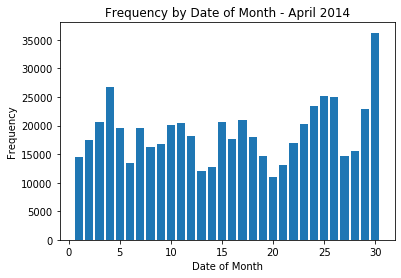

In [12]:
# Create a histogram of Uber usage for the 30 days of the month

hist(data.DoM, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel("Date of Month")
ylabel("Frequency")
title("Frequency by Date of Month - April 2014")

In [13]:
# The number of records (rows) per day of the month

def count_rows(rows):
    return len(rows)

by_date = data.groupby('DoM').apply(count_rows)
by_date

DoM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

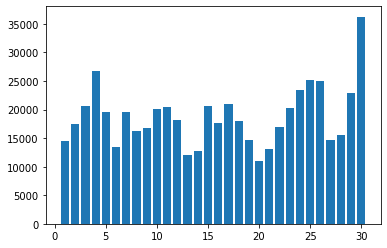

In [14]:
# Create a bar chart by date of month
# Note how it looks exactly the same as the histogram but the advantage of this is that you can manipulate the data in 
# many other ways
bar(range(1, 31), by_date)

In [15]:
# Sort by frequency of records in increasing value

by_date_sorted = by_date.sort_values()
by_date_sorted

DoM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

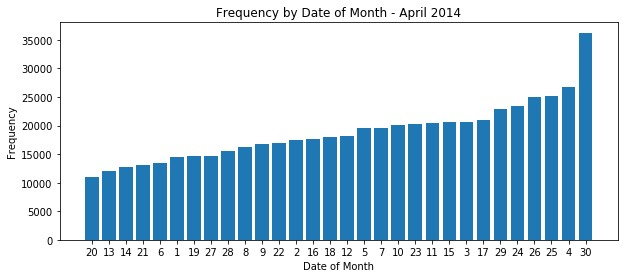

In [34]:
# Set the figure size to be 10 by 4 so that the x values aren't smushed
figure(figsize=(10, 4))

# Create a bar chart by increasing value of frequencies
bar(range(1, 31), by_date_sorted)

# Set index values to match up to their frequency
xticks(range(1, 31), by_date_sorted.index)

xlabel("Date of Month")
ylabel("Frequency")
title('Frequency by Date of Month - April 2014')
;

### Analyze the weekday

''

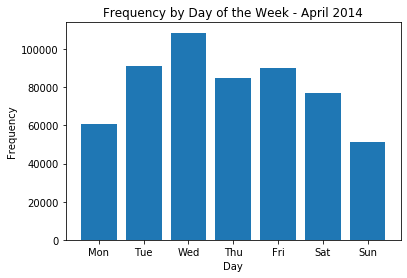

In [41]:
hist(data.Weekday, bins=7, range=(-0.5, 6.5), rwidth=0.8)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

xlabel("Day")
ylabel("Frequency")
title('Frequency by Day of the Week - April 2014')
;

### Analyze the hour

''

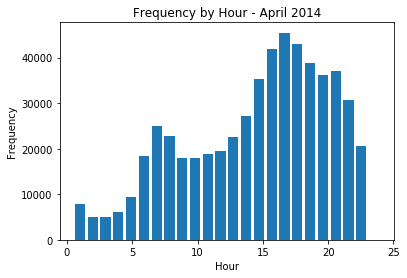

In [45]:
hist(data.Hour, bins=24, range=(0.5, 24), rwidth=0.8)

xlabel("Hour")
ylabel("Frequency")
title('Frequency by Hour - April 2014')
;

### Cross-analysis of hour & day of the week

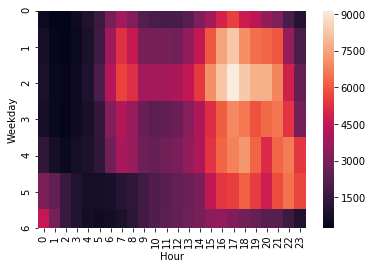

In [47]:
# Plot the data between the hour and day of the week on a heatmap

# unstack() allows you to flip the second index (hour in this case) to become a column name as opposed to 
# being a second level row name
cross_hour_day = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

seaborn.heatmap(cross_hour_day)

### Analyze the latitude and longitude

''

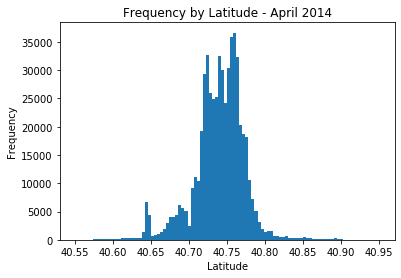

In [49]:
# Plot latitude on histogram
hist(data['Lat'], bins=100, range = (40.55, 40.95))

xlabel("Latitude")
ylabel("Frequency")
title('Frequency by Latitude - April 2014')
;

''

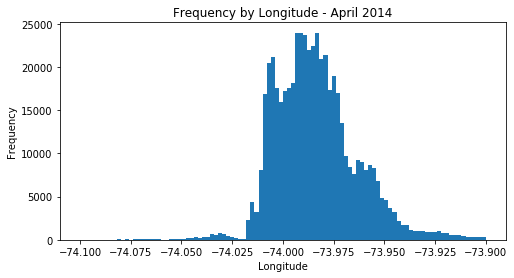

In [54]:
# Plot longitude on histogram
figure(figsize=(8, 4))
hist(data['Lon'], bins=100, range = (-74.10, -73.90))

xlabel("Longitude")
ylabel("Frequency")
title("Frequency by Longitude - April 2014")
;

''

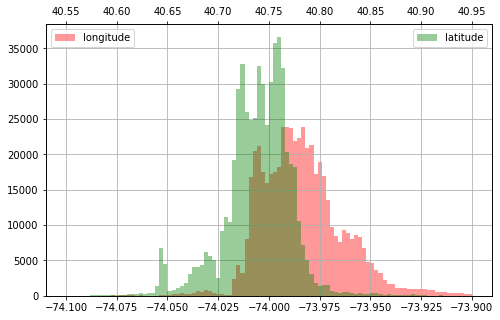

In [58]:
figure(figsize=(8, 5))

# Overlap the histograms.
hist(data['Lon'], bins=100, range = (-74.10, -73.90), color='r', alpha=.4, label = 'longitude')

# Add in grid lines
grid()

# Put longitude legend on upper left
legend(loc='upper left')

# Since one of the ranges is in the negatives and the other is in positives, need to use twiny() to
# overlap them.
twiny()

hist(data['Lat'], bins=100, range = (40.55, 40.95), color='g', alpha=.4, label = 'latitude')

# Put latitude legend on upper right
legend(loc='upper right')
;

(40.7, 41)

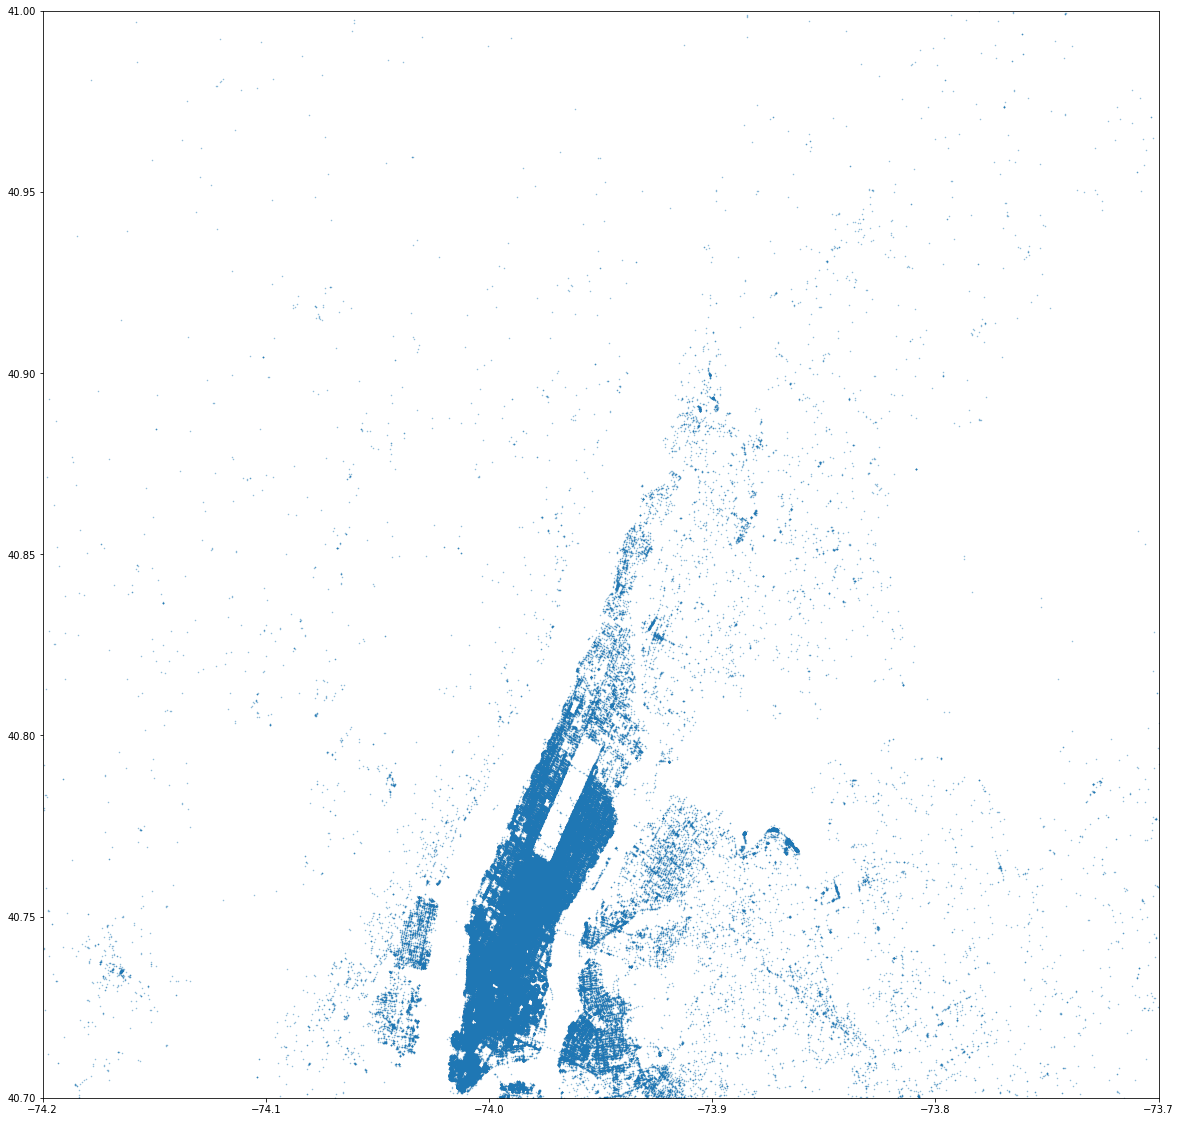

In [63]:
# Show a map of Manhattan through scatterplot diagram

figure(figsize=(20, 20))

# Set a scatter plot of the latitude and longitude
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)

# Set limits of x and y axis
xlim(-74.2, -73.7)
ylim(40.7, 41)